In [1]:
import numpy as np
import pandas as pd
import pyreadr
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
perfomances_dt4 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt4.rds")[None] # also works for RData
perfomances_dt4
# baselevel_p = perfomances_dt5[(perfomances_dt5['NRT'] == 'static') & (perfomances_dt5['policy'] == 'leach_0')]['P'].to_numpy()[0]
# perfomances_dt5['P_dlt'] = perfomances_dt5['P']-baselevel_p
# # CalcGetulate base level Y_corn and create Y_corn_pct (% change with baselevel)
# baselevel_y = perfomances_dt5[(perfomances_dt5['NRT'] == 'static') & (perfomances_dt5['policy'] == 'leach_0')]['Y_corn'].to_numpy()[0]
# perfomances_dt5['Y_corn_pct'] = perfomances_dt5['Y_corn']/baselevel_y

# # #Keep change in Y >= 95%
# perfomances_dt5 = perfomances_dt5[perfomances_dt5['Y_corn_pct'] >= 0.95]
# perfomances_dt5 = perfomances_dt5[perfomances_dt5['Y_corn_pct'] <= 1.05]

# # #Calculate ag-sector cost
# perfomances_dt5['C'] = - perfomances_dt5['P_dlt'] - perfomances_dt5['G']
perfomances_dt4['policy_cost'] = -perfomances_dt4['policy_cost']
perfomances_dt4['L_change'] = -perfomances_dt4['L_change']
# perfomances_dt5[perfomances_dt5['policy_name'] == 'ratio']
perfomances_dt4['policy_NRT'] = perfomances_dt4['policy_name']+'_'+ perfomances_dt4['NRT']
perfomances_dt4

,region,policy,NRT,Y_corn,L1,L2,L,N_fert,P,G,corn_avg_ha,L_change,net_balance,policy_cost,policy_name,policy_val,policy_NRT
0,1-South,ratio_5,static,11171.605203,20.404292,12.499458,32.903751,210.000000,1417.024728,0.000000,1.545126e+07,-0.0,0.000000,-0.000000,ratio,5,ratio_static
1,1-South,ratio_5,dynamic,11127.367638,17.948133,11.569983,29.518116,199.550524,1418.146103,0.000000,1.545126e+07,10.3,1.121374,1.121374,ratio,5,ratio_dynamic
2,1-South,ratio_6,static,11125.542938,19.251150,11.956294,31.207444,204.382804,1385.894456,28.613593,1.545126e+07,5.2,-2.516680,-2.516680,ratio,6,ratio_static
3,1-South,ratio_6,dynamic,11076.981180,16.540817,10.913822,27.454639,192.663185,1388.940290,26.972846,1.545126e+07,16.6,-1.111592,-1.111592,ratio,6,ratio_dynamic
4,1-South,ratio_7,static,11120.595675,18.167834,11.504675,29.672509,200.000000,1360.883395,56.000000,1.545126e+07,9.8,-0.141334,-0.141334,ratio,7,ratio_static
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,3-North,red_28,dynamic,12901.523582,18.978400,18.196318,37.174718,114.895138,1725.786705,0.000000,3.436758e+07,26.7,-36.730810,-36.730810,red,28,red_dynamic
493,3-North,red_29,static,12913.322182,19.515118,18.714764,38.229882,120.000000,1723.865106,0.000000,3.436758e+07,24.6,-38.652410,-38.652410,red,29,red_static
494,3-North,red_29,dynamic,12853.564305,18.718091,18.047982,36.766073,112.614053,1720.669166,0.000000,3.436758e+07,27.5,-41.848350,-41.848350,red,29,red_dynamic
495,3-North,red_30,static,12913.322182,19.515118,18.714764,38.229882,120.000000,1723.865106,0.000000,3.436758e+07,24.6,-38.652410,-38.652410,red,30,red_static


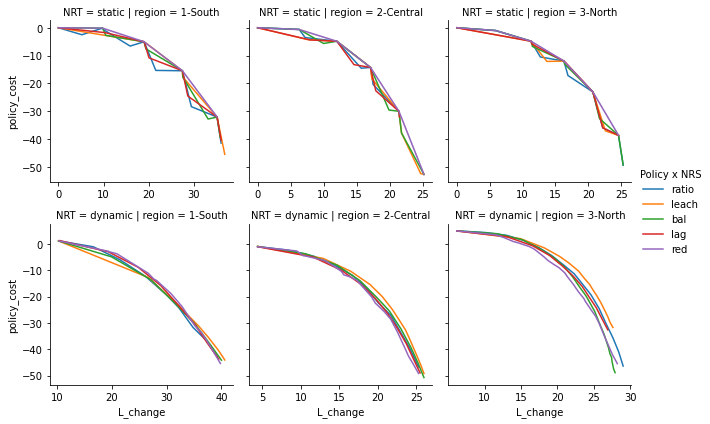

In [10]:
kw = {'color': ['red', 'orange', 'blue', 'green','red', 'orange','blue','green'], 
      'linestyle' : ["-","-","-","-", "-","-","-", "-"]}

graph = sns.FacetGrid(perfomances_dt4, row = 'NRT', col ='region', hue ='policy_name', 
                      sharey = 'row', sharex = False, margin_titles=False) 

graph.map(sns.lineplot, "L_change", "policy_cost").add_legend(title = 'Policy x NRS')  #, loc="lower center",bbox_to_anchor=(0.5, -0.3), ncol=2

#--------------------------------
# graph.map_dataframe(sns.lineplot, x = "L_change", y = "policy_cost", 
#                     hue = "policy_name", 
#             palette=['red', 'orange', 'blue', 'green'], 
#             hue_order = ['ratio', 'leach', 'bal', 'red'])
#--------------------------------

# # Form a facetgrid using columns with a hue 

# kw = {'color': ['green', 'green'], 'linestyle' : ["-","--"]}
# kw = {'color': ['red', 'orange', 'blue', 'green','red', 'orange','blue','green'], 'linestyle' : ["-","-","-","-", "--","--","--", "--"]}

# graph = seaborn.FacetGrid(plot_dt_long, row ='variable', col ='policy_name', hue ='policy_NRT', 
#                           sharey = 'row', sharex = False, margin_titles=False, hue_kws=kw,
#                           hue_order = ['ratio_static', 'leach_static', 'bal_static', 'red_static', 'ratio_dynamic', 'leach_dynamic', 'bal_dynamic', 'red_dynamic'],    
#                           col_order = ['ratio', 'leach', 'bal', 'red'],
#                           row_order = ['N_fert', 'Y_corn', 'L_change', 'P', 'G', 'net_balance']) 


# # map the above form facetgrid with some attributes 

# graph.map(seaborn.lineplot, "policy_val", "value").add_legend(title = 'Policy x NRS')  #, loc="lower center",bbox_to_anchor=(0.5, -0.3), ncol=2

In [3]:
# perfomances_dt5 = perfomances_dt5[perfomances_dt5['L_change'] >= 0]
perfomances_dt5 = perfomances_dt5.sort_values(by=['policy_val'])
ratio_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'ratio') & (perfomances_dt5['NRT'] == 'static')]
leach_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'leach') & (perfomances_dt5['NRT'] == 'static')]
nred_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'red') & (perfomances_dt5['NRT'] == 'static')]
bal_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'bal') & (perfomances_dt5['NRT'] == 'static')]

ratio_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'ratio') & (perfomances_dt5['NRT'] == 'dynamic')]
leach_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'leach') & (perfomances_dt5['NRT'] == 'dynamic')]
nred_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'red') & (perfomances_dt5['NRT'] == 'dynamic')]
bal_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'bal') & (perfomances_dt5['NRT'] == 'dynamic')]

nred_2_dt

,policy,NRT,Y_corn,L,N_fert,P,G,L_change,net_balance,policy_cost,policy_val,policy_name
101,red_0,dynamic,12628.979910,40.131979,177.219640,1644.003439,0.0,5.5,1644.003439,0.703052,0.0,red
103,red_1,dynamic,12628.979910,40.131979,177.219640,1644.003439,0.0,5.5,1644.003439,0.703052,1.0,red
105,red_2,dynamic,12628.975533,40.131443,177.218042,1644.003945,0.0,5.5,1644.003945,0.703558,2.0,red
107,red_3,dynamic,12581.049065,38.167162,169.968591,1642.368855,0.0,10.1,1642.368855,-0.931532,3.0,red
109,red_4,dynamic,12559.663649,37.577882,167.462014,1641.129501,0.0,11.5,1641.129501,-2.170887,4.0,red
111,red_5,dynamic,12557.292678,37.544233,167.256645,1640.941324,0.0,11.6,1640.941324,-2.359064,5.0,red
113,red_6,dynamic,12556.702885,37.540857,167.222385,1640.882735,0.0,11.6,1640.882735,-2.417653,6.0,red
115,red_7,dynamic,12554.842447,37.436208,166.912310,1640.839325,0.0,11.8,1640.839325,-2.461062,7.0,red
117,red_8,dynamic,12519.931815,36.415153,163.065039,1638.644927,0.0,14.2,1638.644927,-4.655461,8.0,red
119,red_9,dynamic,12485.076298,35.764203,159.968591,1635.932668,0.0,15.8,1635.932668,-7.367720,9.0,red


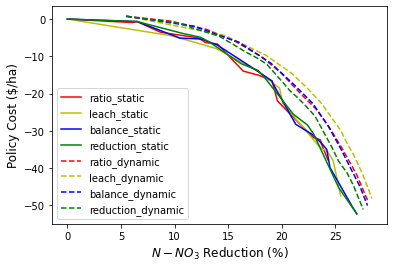

In [4]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax = plt.subplots()
ax.plot(ratio_1_dt['L_change'], ratio_1_dt['policy_cost'], color = 'r', label = 'ratio_static')
ax.plot(leach_1_dt['L_change'], leach_1_dt['policy_cost'], color = 'y', label = 'leach_static')
ax.plot(bal_1_dt['L_change'], bal_1_dt['policy_cost'], color = 'b', label = 'balance_static')
ax.plot(nred_1_dt['L_change'], nred_1_dt['policy_cost'], color = 'g', label = 'reduction_static')

ax.plot(ratio_2_dt['L_change'], ratio_2_dt['policy_cost'], linestyle='dashed', color = 'r',  label = 'ratio_dynamic')
ax.plot(leach_2_dt['L_change'], leach_2_dt['policy_cost'], linestyle='dashed', color = 'y', label = 'leach_dynamic')
ax.plot(bal_2_dt['L_change'], bal_2_dt['policy_cost'], linestyle='dashed', color = 'b', label = 'balance_dynamic')
ax.plot(nred_2_dt['L_change'], nred_2_dt['policy_cost'], linestyle='dashed', color = 'g', label = 'reduction_dynamic')


plt.legend()

plt.xlabel("$N-NO_3$ Reduction (%)", size = 12)
plt.ylabel("Policy Cost ($/ha)", size = 12)
#ax.set_xticks((np.arange(0, 30, 2)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policy_cost.pdf"
plt.savefig(plot_file_name, dpi=300)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policy_cost.png"
plt.savefig(plot_file_name, dpi=300)